# 📊eBay Used Cars: Posting Behavior and Pricing Analysis

## Introduction

- **eBay kleinanzeigen** is an e-commrce company that allows users to buy or view item via retail sales through online. 
- As a data analyst, i want to deep into the dataset to uncover insight to make decisions:
    > * Car Sellers targerting different states in Germany
    > * Optimizing post timing and content for effectiveness
 - This project focuses on: 
>    - Analyzing weekly posting frequency
>    - Estimating the number of days a car stays Online Before Sale
>    - Evaluating price distribution

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

## Table Of Contents
1. [Project](#📊Project:-Analysing-eBays-Car-Sales-in-Germany)
    * [Introduction](#Introduction)
    * [Table Of Contents](#Table-Of-Contents)
    * [Data Descriptions](#Data-Descriptions)
2. [Data Preparation](#Data-Preparation)
3. [Data Cleaning](#Data-Cleaning)
    * [Data Quality Report](#Data-Quality-Report)
    * [Renaming Columns](#Renaming-Columns)
    * [Observing Summary Statistics](#Observing-Summary-Statistics)
        * [Dropping Columns](#Dropping-Columns:)
            * [Num_pictures column](#"num_pictures"-column)
            * [Seller_type, offer_type, ab_test columns](#"seller_type",-"offer_type",-"ab_test"-columns)
            * [Vehicle_type, Gear_box columns](#"Vehicle_type"-&-"Gear_box"-columns)
        * [Investigating Metrics](#Investigating-Metrics:)
            * [Price column: Minimum=0](#price-column:-Minimum-=-0)
            * [Registration_year column](#registration_year-column:-Minimum-=-1000-and-max-=-9999)
            * [Registration_month column: Minimum = 0](#registration_month-column:-Minimum-=-0)   
    * [Converting Types](#Converting-Values)
    * [Converting Values](#Converting-Types)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis-(EDA))
    * [Driven_Kilometers column](#Driven_kilometers-column)
    * [Date columns](#Date-columns)
    * [The mean mileage price](#The-mean-mileage-price)
5. [Trend & Behavioral Analysis](#Trend-&-Behavioral-Analysis)
    * [Price Segment by States](#Price-Segmentation-by-State)
    * [Posting Frequency by Week](#Posting-Frequency-by-Week)
        * [Days Online Before Sale: eBay Car Listings by Brand](#Days-Online-Before-Sale:-eBay-Car-Listings-by-Brand)
    * [Ranking Car Brands](#Ranking-Car-Brands)
        * [The Average Car Price By Brands](#The-Average-Car-Price-By-Brands)
        * [Price Distribution](#Price-Distribution)
6. [Conclusion](#Conclusion)

## Data Descriptions
- 📅**dateCrawled** - When the ad was first crawled. All field-values are taken from this date.
- 🚗**name** - Name of the car.
- 🧑‍**seller** - Whether the seller is private or a dealer.
- 📃**offerType** - The type of listing.
- 🔢**price** - The listed selling price of the car.
- 📃**abtest** - Whether the listing is included in an A/B test.
- 🚗**vehicleType** - The type of vehicle.
- 📅**yearOfRegistration** - The year in which the car was first registered.
- 📦**gearbox** - The type of transmission.
- ⛽**powerPS** - The power of the car in PS.
- 🚗**model** - The car model name.
- 🔢**odometer** - How many kilometers the car has driven.
- 📅**monthOfRegistration** - The month in which the car was first registered.
- ⛽**fuelType** - What type of fuel the car uses.
- 🚗**brand** - The brand of the car.
- 🛠️**notRepairedDamage** - If the car has a damage which is not yet repaired.
- 📅**dateCreated** - The date the eBay listing was created.
- 🔢**nrOfPictures** - The number of pictures in the ad.
- 🔢**postalCode** - The postal code for the location of the vehicle.
- 📅**lastSeenOnline** - When the crawler saw this ad last online.

Note: The fields lastSeen and dateCrawled could be used to estimate how long a car will be at least online before it is sold.

# Data Preparation

- https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen
- https://www.kaggle.com/datasets/ravikanth/germany-postal-codes-gis-city-district-and-state
`[Add a column "state" - link two Excels together based on postal code]`
- The dataset from 05/03/2025 -> 07/04/2025

In [2]:
ebays = pd.read_csv('eBays.csv',encoding='latin1')

In [3]:
# Naming DataFrame Axis
ebays.index.name = "ID"
ebays.columns.name = "Metrics"

In [4]:
display(ebays)

Metrics,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,State,lastSeen
ID,,,,,,,,,,,,,,,,,,,,,
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,...,150000.0,0.0,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,Baden-WÃ¼rttemberg,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,...,125000.0,5.0,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,Rheinland-Pfalz,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,...,125000.0,8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,Bayern,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÃRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,...,150000.0,6.0,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,Bayern,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,...,90000.0,7.0,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,Hessen,4/6/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,3/14/2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,...,20000.0,1.0,NaN,sonstige_autos,NaN,3/14/2016 0:00,0.0,39576.0,Sachsen-Anhalt,4/6/2016 0:46
371820,3/5/2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,...,125000.0,3.0,benzin,smart,nein,3/5/2016 0:00,0.0,26135.0,Niedersachsen,3/11/2016 18:17
371821,3/19/2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,...,150000.0,3.0,diesel,volkswagen,nein,3/19/2016 0:00,0.0,87439.0,Bayern,4/7/2016 7:15


The dataset includes **~372,000** rows with **21** columns

# Data Cleaning

## Data Quality Report

In [5]:
def check_data_quality(df):
    quality_report = {
        'null_values': df.isnull().sum().to_dict(),
        'duplicates': df.duplicated().sum(),
        'df_info': df.info()
    }
    return quality_report

In [6]:
quality_report = check_data_quality(ebays)
display(quality_report)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371824 entries, 0 to 371823
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371824 non-null  object 
 1   name                 371824 non-null  object 
 2   seller               371822 non-null  object 
 3   offerType            371822 non-null  object 
 4   price                371822 non-null  float64
 5   abtest               371822 non-null  object 
 6   vehicleType          333924 non-null  object 
 7   yearOfRegistration   371822 non-null  float64
 8   gearbox              351600 non-null  object 
 9   powerPS              371822 non-null  float64
 10  model                351324 non-null  object 
 11  kilometer            371822 non-null  float64
 12  monthOfRegistration  371822 non-null  float64
 13  fuelType             338408 non-null  object 
 14  brand                371822 non-null  object 
 15  notRepairedDamage

{'null_values': {'dateCrawled': 0,
  'name': 0,
  'seller': 2,
  'offerType': 2,
  'price': 2,
  'abtest': 2,
  'vehicleType': 37900,
  'yearOfRegistration': 2,
  'gearbox': 20224,
  'powerPS': 2,
  'model': 20500,
  'kilometer': 2,
  'monthOfRegistration': 2,
  'fuelType': 33416,
  'brand': 2,
  'notRepairedDamage': 72124,
  'dateCreated': 2,
  'nrOfPictures': 2,
  'postalCode': 2,
  'State': 160,
  'lastSeen': 2},
 'duplicates': 77,
 'df_info': None}

Let's briefly observe the dataset:
- `Missing Values` part:
    - `notRepairedDamage` column accounts the **most null values with 72,124 cars** thats aren't repaired yet.
    - `VehicleType`, `FuelType`,`model`,`gearbox` columns accounts **under 40,000 null values** respectively.
    
Additionally, the dataset shows that there are more than **300,000 data entries** with **21 columns** and **nearly 60 MB** has been used. This is a large dataset.

## Renaming Columns

The column names from `camelcase` which are hard to read, so i'm going to convert them to `snakecase` based on the data dictionary in order to be more desriptive

In [7]:
ebays.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'State', 'lastSeen'],
      dtype='object', name='Metrics')

In [8]:
ebays.rename({
    "dateCrawled":"date_crawled",
    "name": "car_name",
    "offerType":"offer_type",
    "seller":"seller_type",
    "abtest":"ab_test",
    "vehicleType":"vehicle_type",
    "yearOfRegistration":"registration_year",
    "gearbox":"gearbox_type",
    "powerPS":"power_ps",
    "kilometer":"driven_kilometers",
    "monthOfRegistration":"registration_month",
    "fuelType":"fuel_type",
    "brand":"brand_car",
    "notRepairedDamage":"unrepaired_damage",
    "dateCreated":"ad_created",
    "nrOfPictures":"num_pictures",
    "postalCode":"postal_code",
    "State":"state",
    "lastSeen":"lastseen_date_crawled"    
},axis=1,inplace=True)

In [9]:
display(ebays.head(2))

Metrics,date_crawled,car_name,seller_type,offer_type,price,ab_test,vehicle_type,registration_year,gearbox_type,power_ps,...,driven_kilometers,registration_month,fuel_type,brand_car,unrepaired_damage,ad_created,num_pictures,postal_code,state,lastseen_date_crawled
ID,,,,,,,,,,,,,,,,,,,,,
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,...,150000.0,0.0,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,Baden-WÃ¼rttemberg,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,...,125000.0,5.0,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,Rheinland-Pfalz,4/7/2016 1:46


## Observing Summary Statistics

In [10]:
ebays.describe(include="all")

Metrics,date_crawled,car_name,seller_type,offer_type,price,ab_test,vehicle_type,registration_year,gearbox_type,power_ps,...,driven_kilometers,registration_month,fuel_type,brand_car,unrepaired_damage,ad_created,num_pictures,postal_code,state,lastseen_date_crawled
count,371824,371824,371822,371822,3.718220e+05,371822,333924,371822.000000,351600,371822.000000,...,371822.000000,371822.000000,338408,371822,299700,371822,371822.0,371822.000000,371664,371822
unique,15622,233701,2,2,NaN,2,8,NaN,2,NaN,...,NaN,NaN,7,40,2,114,NaN,NaN,16,18706
top,3/5/2016 14:25,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,...,NaN,NaN,benzin,volkswagen,nein,4/3/2016 0:00,NaN,NaN,Nordrhein-Westfalen,4/7/2016 6:45
freq,68,657,371819,371810,NaN,192731,95963,NaN,274431,NaN,...,NaN,NaN,224037,79694,263390,14470,NaN,NaN,89210,708
mean,NaN,NaN,NaN,NaN,1.728639e+04,NaN,NaN,2004.576733,NaN,115.541775,...,125618.494871,5.734510,NaN,NaN,NaN,NaN,0.0,50821.828738,NaN,NaN
std,NaN,NaN,NaN,NaN,3.586535e+06,NaN,NaN,92.830115,NaN,192.072712,...,40111.654175,3.712449,NaN,NaN,NaN,NaN,0.0,25798.790607,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,...,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,...,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,...,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,...,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.000000,NaN,NaN


- **Drop Columns**:
    - `num_pictures` column: This column only contains zeros or null values which doesn't support on analyzing.
    - Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
    - Columns that we don't use for analyzing.
- **Investigate Suspicous Metrics**:
    - `price` column: <span style="color: red;"> Minimum = `0`</span><br>
    - `registration_year` column: <span style="color: red;"> Minimum = `1000` and max = `9999` </span><br>
    - `registration_month` column: <span style="color: red;">Minimum = `0`</span><br>

 ### Dropping Columns:

#### "num_pictures" column

In [11]:
ebays["num_pictures"].value_counts(dropna=False)

num_pictures
0.0    371822
NaN         2
Name: count, dtype: int64

There are **371,822** zero values and **2** with null values. I am going remove this column

In [12]:
ebays = ebays.drop('num_pictures',axis=1)

#### "seller_type", "offer_type", "ab_test" columns

`seller_type` and `offer_type` columns which have **371,819** & **371,810** total counts, respectively

In [13]:
ebays = ebays.drop(['seller_type','offer_type',"ab_test"],axis=1)

#### "Vehicle_type" & "Gear_box" columns

In [14]:
ebays = ebays.drop(columns=["vehicle_type","gearbox_type"],axis=1)

### Investigating Metrics:

#### price column: Minimum = 0

- Unrealistic price for any car
- These data will be stored in a new column.

In [15]:
ebays["price"].value_counts(dropna=False).sort_index(ascending=True).head()

price
0.0    10784
1.0     1189
2.0       12
3.0        8
4.0        1
Name: count, dtype: int64

In [16]:
ebays.loc[ebays["price"]==0,["car_name","price","brand_car"]]

Metrics,car_name,price,brand_car
ID,,,
7,VW_Derby_Bj_80__Scheunenfund,0.0,volkswagen
40,Suche_Opel_corsa_a_zu_verschenken,0.0,opel
115,Golf_IV_1.4_16V,0.0,volkswagen
119,Polo_6n_Karosse_zu_verschenken,0.0,volkswagen
157,Opel_meriva_1.6_16_v_lpg__z16xe_no_OPC,0.0,opel
...,...,...,...
371652,Verkaufen_einen_Opel_corsa_b_worlcup_cool,0.0,opel
371688,Ford_Fiesta_1.3___60PS___Bj_2002___Klima___Servo,0.0,ford
371698,Suzuki_Swift_zu_verkaufen,0.0,suzuki


- There are **10,784 rows** where `price = 0`. I don't think removing them is the best solution. I guess there are two possible reasons for this issue:
    - Manual data entries 
    - Wrong or missing inputs => the system sets the price to zero.
- I'm going to create a new column called `price_zero` to see how many cars that have `a price of zero`, to calculate the percentage % of the total later.

In [17]:
ebays["price_zero"] = ebays["price"]==0

In [18]:
ebays["price_zero"].value_counts()

price_zero
False    361040
True      10784
Name: count, dtype: int64

- False: Any non-zero numbers
- True: Zero

In [19]:
ebays["price"].astype("Int64").value_counts(dropna=False).sort_index().head(30)

price
0     10784
1      1189
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
16        2
17        5
18        3
19        3
20       51
21        1
24        1
25       33
26        1
27        1
29        2
30       55
32        1
33        1
35       18
Name: count, dtype: Int64

- There are many listings with prices **below 35**, including **1**. However an average price for a car in Germany is **44,630** €.
- As i said, removing unrealistic prices is not logical, therefore i reviewed the summary statistics for listings **where 0 < price < 44,630**

In [20]:
ebays.loc[ebays["price"].between(1,44630)].describe()

Metrics,price,registration_year,power_ps,driven_kilometers,registration_month,postal_code
count,358889.000000,358889.000000,358889.000000,358889.000000,358889.000000,358889.000000
mean,5510.410219,2004.387579,115.358297,126064.186977,5.796007,50958.571372
std,6470.780554,79.512283,188.402742,39448.361112,3.686695,25760.336149
min,1.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1250.000000,1999.000000,71.000000,125000.000000,3.000000,30657.000000
50%,3000.000000,2003.000000,105.000000,150000.000000,6.000000,49716.000000
75%,7300.000000,2008.000000,150.000000,150000.000000,9.000000,71640.000000
max,44500.000000,9999.000000,20000.000000,150000.000000,12.000000,99998.000000


#### registration_year column: Minimum = 1000 and max = 9999

- Inaccurate data entries
- I just searched on Google and the first car appeared in **1885**.
- Based on `data_crawled` and `last_seen_data_crawled`, the eBays Car Sales listening in 2016. Therefore i only keep rows where `registration_year` > 1885 and < 2017

In [21]:
before_1885 = ebays.loc[ebays["registration_year"]<1885]
display(Markdown(f"There are {len(before_1885)} cars have a `registration_year` before **1885**"))

There are 68 cars have a `registration_year` before **1885**

In [22]:
ebays = ebays.loc[(ebays["registration_year"]>=1885) & (ebays["registration_year"] < 2017)]

In [23]:
ebays["registration_year"].value_counts().head(50)

registration_year
2000.0    24574
1999.0    22783
2005.0    22330
2006.0    20252
2001.0    20231
2003.0    19885
2004.0    19761
2002.0    19211
1998.0    17973
2007.0    17684
2008.0    16184
2009.0    15617
1997.0    14714
2010.0    12364
2011.0    12073
1996.0    10895
2016.0     9865
1995.0     9664
2012.0     9427
2013.0     6162
1994.0     4876
2014.0     4805
1993.0     3473
1992.0     3050
2015.0     2987
1990.0     2859
1991.0     2813
1989.0     1344
1988.0      968
1985.0      787
1987.0      697
1980.0      629
1986.0      576
1983.0      455
1984.0      423
1970.0      372
1982.0      335
1979.0      312
1978.0      307
1981.0      284
1972.0      248
1960.0      214
1973.0      205
1974.0      201
1971.0      199
1976.0      193
1977.0      193
1966.0      160
1969.0      154
1975.0      152
Name: count, dtype: int64

#### registration_month column: Minimum = 0

`registration month` = **0** is hard to understand, so i decide to replace it by **NaN Values** to represent missing data.

In [24]:
ebays.loc[ebays["registration_month"]==0,"registration_month"] =np.nan

In [25]:
ebays["registration_month"].value_counts(dropna=False)

registration_month
3.0     34996
NaN     33941
6.0     32068
4.0     29854
5.0     29613
7.0     28060
10.0    26507
11.0    24692
12.0    24504
9.0     24347
1.0     23809
8.0     22970
2.0     21702
Name: count, dtype: int64

On eBays, there are approximately **34,000** unregistered cars listed for sale. I believe most unregistered cars are sold at lower prices compared to those with proper documentation. Especially, there are **~4,200** cars that have a **price of zero**.

In [26]:
s = ebays.loc[pd.isna(ebays["registration_month"]),["price"]]
print(s.value_counts())

price 
0.0       4184
500.0     1022
300.0      834
1000.0     806
400.0      711
          ... 
6290.0       1
624.0        1
6120.0       1
6106.0       1
4111.0       1
Name: count, Length: 1126, dtype: int64


## Converting Values

In [27]:
# Mapping dict
english = {   
    "nein":"yes",
    "ja":"no"}

# Execute mapping dict with series
ebays["unrepaired_damage"] = ebays["unrepaired_damage"].map(english)

In [28]:
ebays["unrepaired_damage"].unique()

array([nan, 'no', 'yes'], dtype=object)

## Converting Types

- Using: **series.astype** to cast a pandas object to a specified dtype.
- Using: **pandas.to_datetime** to convert to datetime object.

The purpose of converting is to support me calculate "How long would it take to sell a car online", etc.

In [29]:
def convert_types(dataset,col_name,dtypes):
    dataset[col_name] = dataset[col_name].astype(dtypes)
def convert_datetime(dataset,col_name):
    dataset[col_name] = pd.to_datetime(dataset[col_name])

Because NaN are not allowed to convert to Int, instead Int64 allows NaN doing that.

In [30]:
# Execute converting an old type to new type
convert_types(ebays,"price",int)  #price
convert_types(ebays,"registration_year","Int64")  #registration_year
convert_types(ebays,"registration_month","Int64") #registration_month
convert_types(ebays,"driven_kilometers",int) #driven_kilometers
convert_types(ebays,"power_ps",int) #power_ps
convert_types(ebays,"postal_code",int) #postal_code

In [31]:
# Execute converting object to datetime
convert_datetime(ebays,"date_crawled") #date_crawled
convert_datetime(ebays,"lastseen_date_crawled") #lastseen_date_crawled
convert_datetime(ebays,"ad_created") #ad_created

# Exploratory Data Analysis (EDA)

### Driven_kilometers column

In [32]:
print(ebays["driven_kilometers"].unique().shape)
ebays["driven_kilometers"].value_counts().sort_index(ascending=False)

(13,)


driven_kilometers
150000    230353
125000     36687
100000     15464
90000      12157
80000      10763
70000       9544
60000       8513
50000       7446
40000       6275
30000       5906
20000       5508
10000       1848
5000        6599
Name: count, dtype: int64

The value shows that there is a huge gap regarded number of vehicles between **high mileage and low mileage vehiles**. But, there are no outliers to remove.

### Date columns

Let's explore `date` columns: `date_crawled`,`last_seen`, `ad_created`. In `DataCleaning` part, i converted these columns to datetime type.

In [33]:
ebays[["date_crawled","ad_created","lastseen_date_crawled"]].head()

Metrics,date_crawled,ad_created,lastseen_date_crawled
ID,,,
0,2016-03-24 11:52:00,2016-03-24,2016-04-07 03:16:00
1,2016-03-24 10:58:00,2016-03-24,2016-04-07 01:46:00
2,2016-03-14 12:52:00,2016-03-14,2016-04-05 12:47:00
3,2016-03-17 16:54:00,2016-03-17,2016-03-17 17:40:00
4,2016-03-31 17:25:00,2016-03-31,2016-04-06 10:17:00


First of all, let's anlyze the date where it was first collected by the crawler

In [34]:
date_crawled = pd.to_datetime(ebays["date_crawled"]).dt.strftime("%d/%m/%Y")
date_crawled = date_crawled.value_counts(dropna=False).sort_values(ascending=False)
print(date_crawled)

date_crawled
03/04/2016    13863
04/04/2016    13453
20/03/2016    13005
12/03/2016    12933
14/03/2016    12909
07/03/2016    12792
21/03/2016    12770
19/03/2016    12572
02/04/2016    12517
28/03/2016    12512
09/03/2016    12227
29/03/2016    12203
01/04/2016    12198
08/03/2016    11982
30/03/2016    11970
15/03/2016    11933
25/03/2016    11759
11/03/2016    11669
10/03/2016    11642
22/03/2016    11595
26/03/2016    11402
23/03/2016    11400
31/03/2016    11376
17/03/2016    11267
16/03/2016    10783
27/03/2016    10761
24/03/2016    10674
05/03/2016     9159
13/03/2016     5623
06/03/2016     5194
18/03/2016     4673
05/04/2016     4544
06/04/2016     1130
07/04/2016      573
Name: count, dtype: int64


The proportions of ad posting dates showed that the **`uniformity of ad impressions`** and **`active among car sellers`** on eBay throughout March and the first week of April. Remarkably, **April 6** and **7** recorded the two lowest posting proportions.

In [35]:
lastdate_crawled = pd.to_datetime(ebays["lastseen_date_crawled"]).dt.strftime("%d/%m/%Y").value_counts(normalize=True,dropna=False).sort_values(ascending=False)
print(lastdate_crawled)

lastseen_date_crawled
06/04/2016    0.219471
07/04/2016    0.130716
05/04/2016    0.126770
17/03/2016    0.028550
04/04/2016    0.025545
03/04/2016    0.025206
02/04/2016    0.024811
31/03/2016    0.024150
01/04/2016    0.023945
30/03/2016    0.023752
12/03/2016    0.023268
29/03/2016    0.023186
28/03/2016    0.022103
22/03/2016    0.020498
21/03/2016    0.020030
20/03/2016    0.019758
24/03/2016    0.019156
25/03/2016    0.018915
23/03/2016    0.018016
27/03/2016    0.016725
15/03/2016    0.016370
16/03/2016    0.016322
19/03/2016    0.016179
26/03/2016    0.016008
11/03/2016    0.012970
14/03/2016    0.012270
10/03/2016    0.011494
09/03/2016    0.009934
13/03/2016    0.008407
08/03/2016    0.007973
18/03/2016    0.006845
07/03/2016    0.005274
06/03/2016    0.004089
05/03/2016    0.001294
Name: proportion, dtype: float64


On April 5 to 7 recorded the most sold cars  on eBay in the dataset. However, sales  that are **triple, quardruple and even 5 times** compared to any date in March seem unsual.

**Note on Kaggle** : The fields lastSeen and dateCrawled could be used to estimate how long a car will be at least online before it is sold.

In [36]:
ad_created = pd.to_datetime(ebays["ad_created"]).dt.strftime("%d/%m/%Y").value_counts(normalize=True,dropna=False).sort_values(ascending=False)
print(ad_created)

ad_created
03/04/2016    0.039004
04/04/2016    0.037780
20/03/2016    0.036529
12/03/2016    0.036055
21/03/2016    0.035840
                ...   
28/12/2015    0.000003
27/12/2015    0.000003
03/01/2016    0.000003
10/08/2015    0.000003
18/06/2015    0.000003
Name: proportion, Length: 113, dtype: float64


There are various of ad created list across **2014** and **2016**. Most fall within within **4-5 months** of the listing date, but a few are quite old, with the oldest at around 2 years.

### The mean mileage price

In [37]:
ebays.loc[:,["brand_car","driven_kilometers","price"]]

Metrics,brand_car,driven_kilometers,price
ID,,,
0,volkswagen,150000,480
1,audi,125000,18300
2,jeep,125000,9800
3,volkswagen,150000,1500
4,skoda,90000,3600
...,...,...,...
371819,sonstige_autos,20000,2200
371820,smart,125000,1199
371821,volkswagen,150000,9200


To calculate the **mean** price and mileage of car brand in Pandas. There are several steps below:
- Step 1: Create an empty dictionary: {**Keys**: `car brand`} & {**values**: `mean_price` / `mean_mileage`}
- Step 2: Loop thourg ebays["brand_car"] and using `pd.unique()` to return unique brand_car
- Step 3: Filter the dataframe for rows matching each brand
Example: if `brand == "bmw"`, so unique_brand will contains all rows that have brand = "bmw"
- Step 4: Calculate the mean of `Price` and `mileage` for each brand and store the values in the dictionary.

In [38]:
#Price
mean_price = {}
for brand in ebays["brand_car"].unique():
    unique_brand = ebays.loc[(ebays["brand_car"]==brand)]
    mean_price[brand] = int(unique_brand["price"].mean())
    
#Mileage
mean_mileage = {}
for brand in ebays["brand_car"].unique():
    unique_brand = ebays.loc[(ebays["brand_car"]==brand)]
    mean_mileage[brand] = unique_brand["driven_kilometers"].mean().round(2)

After calculating the mean price and mileage, i want to store it a new DataFrame. 
- Convert the dictionary to pd.Series:
    - The **Keys** of dictionary will become **Index**
    - The **Values** will become data in the Series.
- Conver the Series to DataFrame: using this syntax `pd.DataFrame(Series, columns=['name'])`

Note: if we want to add a new Series to Pandas, the method is like dictionary. Have to thanks to Pandas Index Alignment


In [39]:
#Storing Aggerate(mean) Data in a DataFrame
# Mean Price
mean_price_series = pd.Series(mean_price).sort_values(ascending=False)
mean_mileage_price_df = pd.DataFrame(mean_price_series, columns=['mean_price'])

# Mean Mileage
mean_mileage_series = pd.Series(mean_mileage).sort_values(ascending=False)

#Add a Series to DataFrame
mean_mileage_price_df["mean_mileage"] = mean_mileage_series
mean_mileage_price_df.head(10)

,mean_price,mean_mileage
sonstige_autos,641989,86617.57
porsche,51301,98318.14
alfa_romeo,36833,128726.31
trabant,20793,56070.81
mercedes_benz,17614,130575.83
land_rover,16814,119298.82
audi,16212,129492.68
bmw,14793,132661.64
jaguar,14232,121872.96
volkswagen,13637,128342.45


The price range spreads over from **10,000 to 52,000**. However, the more expensive vehicles do not mean to have higher mileage than less expensive ones.

# Trend & Behavioral Analysis

## Price Segmentation by State

In [40]:
ebays[["model","price","brand_car","state"]].head(10)

Metrics,model,price,brand_car,state
ID,,,,
0,golf,480,volkswagen,Baden-WÃ¼rttemberg
1,NaN,18300,audi,Rheinland-Pfalz
2,grand,9800,jeep,Bayern
3,golf,1500,volkswagen,Bayern
4,fabia,3600,skoda,Hessen
5,3er,650,bmw,Nordrhein-Westfalen
6,2_reihe,2200,peugeot,Rheinland-Pfalz
7,andere,0,volkswagen,Brandenburg
8,c_max,14500,ford,Bayern


- First of all, we have atleast 16 states based on `postal_code`. Overall, there are **7 states (40%)** recorded fewer than **10,000**. Right now, we want to know the price segmentation within each state. Whether, States with higher sales tend to have more expensive vehicles  compared to those lower sales.

In [41]:
ebays["state"].value_counts()

state
Nordrhein-Westfalen       85269
Bayern                    53494
Niedersachsen             41227
Baden-WÃ¼rttemberg        40845
Hessen                    32436
Rheinland-Pfalz           20788
Berlin                    14744
Schleswig-Holstein        13705
Sachsen                   10913
Brandenburg                8719
Sachsen-Anhalt             6937
Hamburg                    6777
ThÃ¼ringen                 6533
Saarland                   5985
Mecklenburg-Vorpommern     5437
Bremen                     3099
Name: count, dtype: int64

The key method is: **pd.cut** to segment and store data values into bins

- **Code Explaination**:
    - **Step 1**: Create a `new column` in eBays
    - **Step 2**: Use **pandas.cut method**: pd.cut(Series,bins,labels)
        * Bins: the criteria to bin by
        * Labels: specifies the labels for the returned bins
    - **Step 3**: Inside the parameter:
        * My input: ebays["price"]
        * `bins`, `labels` : the price range that i want to label
            * 0 -> 10,000 : `cheap`
            * 11,000 -> 30,000: `mid-range`
            * 31,000 -> 50,000: `expensive`
            * over 50,000 : `costly` 

In [42]:
#range: 0-10, 11-30,31-50,51
ebays["price_segment"] = pd.cut(ebays["price"],bins = [0,10000,30000,50000,np.inf],labels=["cheap","mid-range","expensive","costly"])

In [43]:
price_segment_by_state = (ebays.groupby(["state", "price_segment"], observed=True).size().unstack(fill_value=0))
print(price_segment_by_state)

price_segment           cheap  mid-range  expensive  costly
state                                                      
Baden-WÃ¼rttemberg      31970       7253        594     247
Bayern                  40218      10671       1164     349
Berlin                  12086       2121        133      70
Brandenburg              7213        954         55      10
Bremen                   2612        370         26      17
Hamburg                  5414       1125         86      41
Hessen                  25916       5195        429     187
Mecklenburg-Vorpommern   4632        464         27      11
Niedersachsen           33441       5667        484     121
Nordrhein-Westfalen     70347      11534        810     320
Rheinland-Pfalz         16781       3190        218      66
Saarland                 4893        839         46      16
Sachsen                  9024       1219         88      33
Sachsen-Anhalt           5863        608         36      13
Schleswig-Holstein      11664       1547

Price Segmentation Overview
---
* * *
**🚗 Insight #1: Cheap Segmentation** achieves mostly in the column
>    - Every State has the remarkable number of `cheap cars`.
>    - For example: `Nordrhein-Westfalen` has **70,347** cheap vehicles, compared to **810** expensive and **320** ones.
>    - Market mainly focuses on cheap vehicles => This is Mass Market aiming to as many people as possible

**🚗 Insight #2: There are some states which have diversified market**
>    - `Nordrhein-Westfalen & Bayern` have high number of values in 4 segmentations
>    -  These states are potential markets for `expensive` and `costly` segmentations.

**🚗 Insight #3: Some states almost dont have costly vehicle**
>    - `Mecklenburg-Vorpommern`,`Brandenburg`,`Sachsen-Anhalt`, and `ThÃ¼ringen` have less than **15** vehicles.
>    - The demand for hight-level segment in these states is small.

**📑Recommend**:
>    - `Nordrhein-Westfalen`, `Bayern`, `Baden-WÃ¼rttemberg` can expand to provide `expensive` and `costly` vehicles, because of the markets.
>    - Should not invest in `expensive` and `costly` segment in states in **Insight#3**, as the market is too small.
>    - Apply discount to encourage customers buying mid-range vehicles.

## Posting Frequency by Week

- To determine the weekly posting trend of car sellers on eBay. I'm going to use `ad_created` column to find out **the date which the post created**.

    - First of all, i'm going to use the column and covert it to the name of the days of the week.
    - After that, using **Pandas.Series.Map** to **change multiple values**.
        - Example: {Monday -> Thursday is `Weekday`} & {Friday -> Saturday is `Weekend`}

- The purpose of doing these things to find out on eBays, when everyone **tend to make a post in weekday or weekend** and **which days have the most posts in particular**.

- Note for datetime:
    - %A: Weekday as locale’s full name.

In [44]:
ebays['day_type'] = ebays["ad_created"].dt.strftime("%A")
ebays['day_type'].unique()

array(['Thursday', 'Monday', 'Friday', 'Saturday', 'Tuesday', 'Sunday',
       'Wednesday'], dtype=object)

In [45]:
# Mapping Dictionary
weektype_dict ={
    "Monday":"Weekday",
    "Tuesday":"Weekday",
    "Wednesday":"Weekday",
    "Thursday":"Weekday",
    "Friday":"Weekend",
    "Saturday":"Weekend",
    "Sunday":"Weekend"
}
ebays["week_type"] = ebays["day_type"].map(weektype_dict)

In [46]:
# Preparation: Piechart
week_chart = ebays["week_type"].value_counts(dropna=False).sort_values(ascending=False).to_dict()
week_type = []
week_posts = []
for week, nums in week_chart.items():
    week_type.append(week)
    week_posts.append(nums)
    
# Preparation: BarChart
day_chart = ebays["day_type"].value_counts(dropna=False).sort_values(ascending=False).to_dict()
day_type = []
day_posts = []
for day, nums in day_chart.items():
    day_type.append(day)
    day_posts.append(nums)

# Visualiztion: Subplot PieChart & BarChart

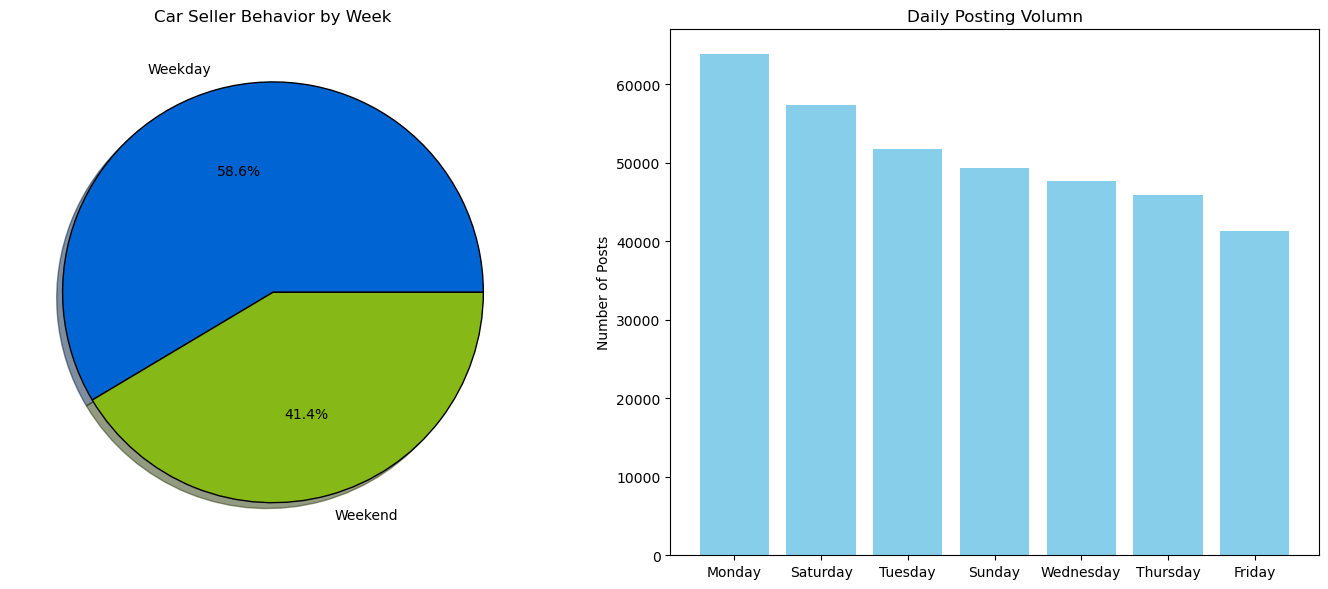

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=(14,6))

# Pie chart: week_type
colors = ['#0064D2','#86B817']
axes[0].pie(week_posts, labels=week_type, colors=colors, autopct= '%1.1f%%', shadow=True, wedgeprops = {'edgecolor':'black'})
axes[0].set_title('Car Seller Behavior by Week')

# Bar chart: day_type
axes[1].bar(day_type, day_posts, color="skyblue")
axes[1].set_title("Daily Posting Volumn")
axes[1].set_ylabel("Number of Posts")

#Display the result
plt.tight_layout()
#plt.savefig('Behavior.png')
plt.show()

Seller Behavior Observation
---
* * *
The trend of User on eBays is based on the number of posts
1. **Insight #1: Weekday& Weekend**
>    - `Weekday` ad postings account for **58.6%**, while `Weekend` accounts for **41.4%**. 
>    - There is only a slight difference with **17.2%**, showing that sellers are active on both `Weekday` & `Weekend`
2. **Insight #2: Daily Posting Volume**
>    - The distribution of Posts is quite uniform which is more than **40,000** in every day.
>    - Notably, Monday has oustanding values with **+60,000** posts, indicating a peak day of the week.
3. **Recommendation**:
>    - Sellers: Posting on **Sunday** or **Monday** will be effective to attract more customers and ehance a chance to buy car.
>    - Ebay Platform: Icreasing the traffic by combining with marketing.

### Days Online Before Sale: eBay Car Listings by Brand

When looking at the `Daily Posting Volumn` bar chart, i'm curious that how long a car of each brand on eBay will be online before it is sold.

In [48]:
# Min Mean Max
brand_days = {}
for brand in ebays["brand_car"].unique():
    unique_brand = ebays.loc[ebays["brand_car"]== brand]
    listing_days = (unique_brand["lastseen_date_crawled"] - unique_brand["ad_created"]).dt.days
    brand_days[brand] = (
                        listing_days[listing_days > 0].min(),
                        listing_days.mean(),
                        listing_days.max())
brand_days_df = pd.DataFrame.from_dict(brand_days,orient='index',columns = ['Min_days','Mean_days','Max_days'])
brand_days_df.sort_values(by='Mean_days')

,Min_days,Mean_days,Max_days
daewoo,1,7.745136,42
opel,1,8.225698,209
ford,1,8.408958,59
renault,1,8.418614,136
daihatsu,1,8.481434,33
volkswagen,1,8.590790,193
nissan,1,8.606973,62
peugeot,1,8.674203,239
toyota,1,8.751208,43
fiat,1,8.856739,292


eBays Listing Overview:
---
***
- **Minimum days**:these brands have the common point- the fastest time to sell a vehicle is just 1 day.
- **Mean days**: On average, it takes between 7 and 11 days to sell a vehicle.
- **Max days**: `alfa_romeo` stands out with 759 days to sell a car

## Ranking Car Brands

### The Average Car Price By Brands

Before digging into the `impact of "Zero" Price Distribution`. I would like to get to work on calculate **the avg of car price**. Because there are **40 brands** in the dataset, but some brands account for **less than 1% of the listings** which do not provide **useful insight**. Therefore, i will limit our analysis to brands that represent **more than 1%** of total listings.

In [49]:
brand_proportions = ebays["brand_car"].value_counts(normalize=True,dropna=False)
print(brand_proportions)

brand_car
volkswagen        0.212369
bmw               0.109678
opel              0.107062
mercedes_benz     0.095983
audi              0.089348
ford              0.068845
renault           0.047574
peugeot           0.029855
fiat              0.025746
seat              0.018627
skoda             0.015409
mazda             0.015342
smart             0.014107
citroen           0.013874
nissan            0.013575
toyota            0.012754
sonstige_autos    0.010648
hyundai           0.009830
mini              0.009214
volvo             0.009127
mitsubishi        0.008265
honda             0.007595
kia               0.006878
alfa_romeo        0.006355
suzuki            0.006318
porsche           0.006145
chevrolet         0.005016
chrysler          0.003943
dacia             0.002448
jeep              0.002187
daihatsu          0.002187
land_rover        0.002137
subaru            0.002123
jaguar            0.001720
trabant           0.001622
saab              0.001456
daewoo            

In [50]:
certain_brand = brand_proportions[brand_proportions > 0.01].index
print(certain_brand)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'mazda', 'smart', 'citroen',
       'nissan', 'toyota', 'sonstige_autos'],
      dtype='object', name='brand_car')


In [51]:
brand_mean_price = {}
for car_brand in certain_brand:
    unique_brand = ebays.loc[ebays["brand_car"]==car_brand]
    brand_mean_price[car_brand] = int(unique_brand["price"].mean())
display(brand_mean_price)

{'volkswagen': 13637,
 'bmw': 14793,
 'opel': 3247,
 'mercedes_benz': 17614,
 'audi': 16212,
 'ford': 8698,
 'renault': 2365,
 'peugeot': 3207,
 'fiat': 4146,
 'seat': 4419,
 'skoda': 6462,
 'mazda': 5795,
 'smart': 3585,
 'citroen': 9162,
 'nissan': 4584,
 'toyota': 5265,
 'sonstige_autos': 641989}

# Visualization: Bar Chart

In [52]:
#Preparation
sorted_brands = sorted(brand_mean_price.items(), key=lambda x:x[1],reverse=True)

brand_car = []
avg_price = []
for brand, price in sorted_brands:
    brand_car.append(brand)
    avg_price.append(price)

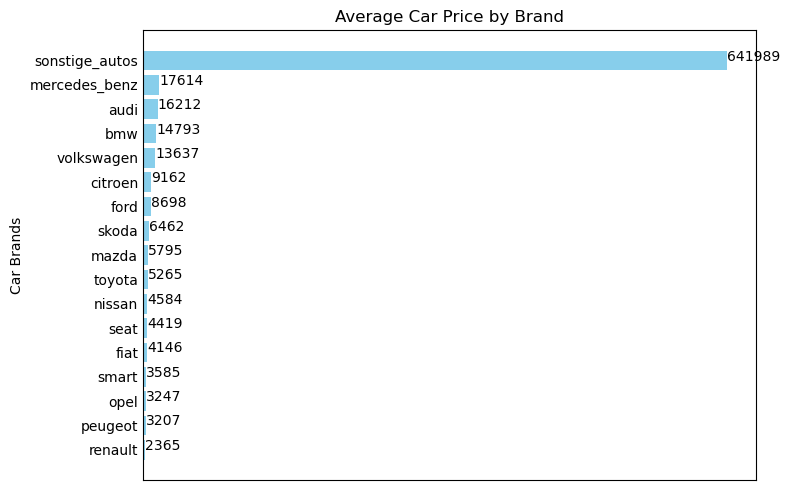

In [53]:
#print(plt.style.available)
plt.style.use('tableau-colorblind10')

#Reverse
brand_car.reverse()
avg_price.reverse()


plt.figure(figsize=(8,5))
plt.barh(brand_car,avg_price,color = 'Skyblue')

#Title,x-label and y-label
plt.title("Average Car Price by Brand")
plt.ylabel("Car Brands")
plt.xticks([])  # <== ẩn nhãn trục x

#Display The Value of Each Bar
for index, value in enumerate(avg_price):
    plt.text(value, index,
             str(value))
    
#Remove tick marks
plt.tick_params(axis='y', length=0)

#Display the chart
plt.tight_layout()
plt.savefig('AverageCarPriceByBrand.png')
plt.show()

Mean Car Price by Brand Observation
---
* * *
1. **Special Case: Sonstige_autos**
>    - Extracting percentage more than 1% from total shows an interesting case about Sonstige_autos. The mean price of a car in `Sonstige_autos` labels is around **642,000** with the percentage only 1.06% => 1 Car in `Sontige_autos` = 37 mercedes cars.
2. **Price exclude special case** 
>    - `Opel`, `peugeot` and `renault` are these brands with low segment which are suitable for customers have limited budget
> - The mean price of `mercedes_benz`, `audi`, `bmw` and `volkswagen` have price range +10,000 which represent mid-range vehicles

## Price Distribution

📝My purpose in creating `price_zero` column in the `eBays` dataset to analyze the impact of the **zero prices** on car brands. There are several steps to determine:
- Step 1: Calculate the percentage of listings with a price of zero out of total number of listings.
- Step 2: Count how many rows have a zero price, and use the **value_counts**.
- Step 3: Display the result and store them in a variable to prepare for visualization.

📝Explain Code:
- Step 1: Select specific rows from eBays dataframe  by using df.loc (with the bolean mask = 0), sum() divide len(total rows)
- Step 2: Filter any brands that having zero price and use value_counts to return unique brands

In [54]:
#brandcar_zero      *Note: True = (price==0) , False = (price> 0)
proportion1 = (ebays["price_zero"]==True).sum() / len(ebays["price_zero"])
brandcar_zero = ebays.loc[(ebays["price_zero"]==True),"brand_car"].value_counts()
display(Markdown(f"The percentage of `zero prices` out of total: **{proportion1:.2%}** with **{len(brandcar_zero)}** car brands that has been affected."))


#brandcar_no_zero
proportion2= (ebays["price_zero"]==False).sum() / len(ebays["price_zero"])
brandcar_no_zero = ebays.loc[(ebays["price_zero"]==False),"brand_car"].value_counts()


#Convert to dictionary - take top 15 car brands.
brandcar_zero = brandcar_zero.sort_values(ascending=False).head(15).to_dict()
brandcar_no_zero = brandcar_no_zero.sort_values(ascending=False).head(15).to_dict()

The percentage of `zero prices` out of total: **2.81%** with **40** car brands that has been affected.

In [55]:
# Preparation: BarChart 1
sorted_value1 = sorted(brandcar_zero.items(),key=lambda x:x[1],reverse=True)
brand1_car = []
num1_car = []
for brand, nums in sorted_value1:
    brand1_car.append(brand)
    num1_car.append(nums)
    
# Preparation: BarChart 2
sorted_value2 = sorted(brandcar_no_zero.items(), key=lambda x:x[1],reverse=True)
brand2_car = []
num2_car = []
for brand, nums in sorted_value2:
    brand2_car.append(brand)
    num2_car.append(nums)

# Visualization: Subplot Two Horizontal Bar Charts

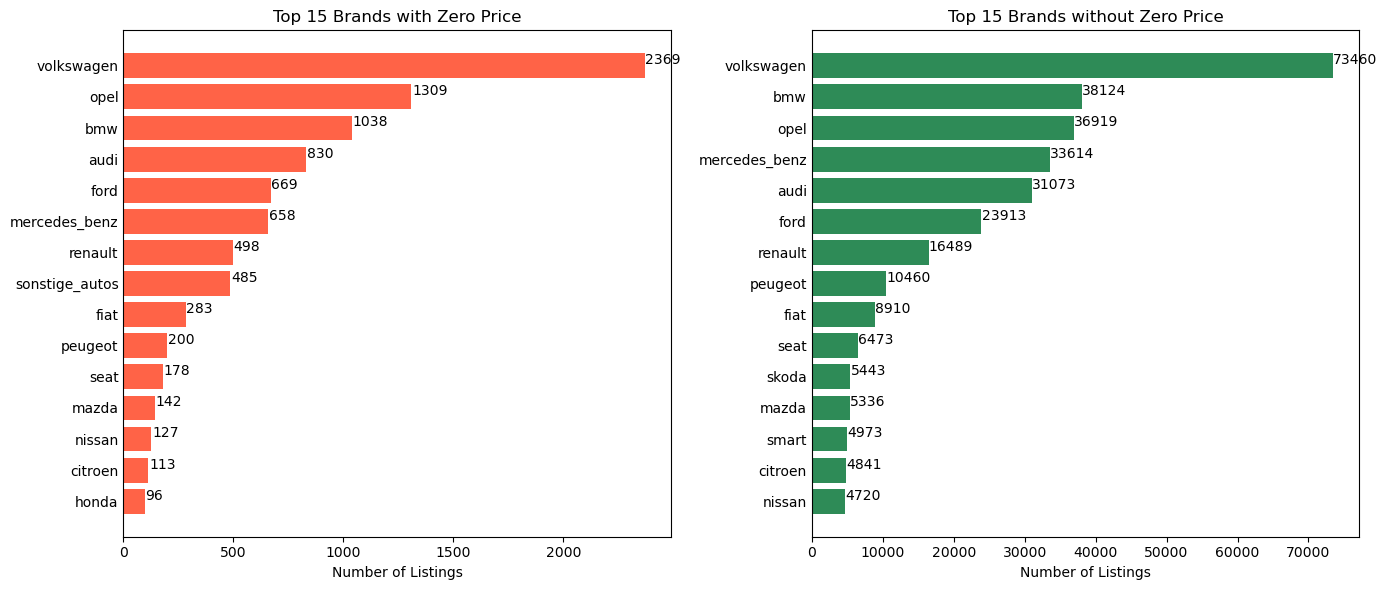

In [56]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
#Reverse
brand1_car.reverse()
num1_car.reverse()
brand2_car.reverse()
num2_car.reverse()


#BarChart 1
axes[0].barh(brand1_car, num1_car,color='tomato')
axes[0].set_title('Top 15 Brands with Zero Price')
axes[0].set_xlabel('Number of Listings')
axes[0].tick_params(axis='y',length=0)
#Display the value
for i, v in enumerate(num1_car): 
    axes[0].text(v + 3, i + .05, str(v), 
            color = 'black')

#BarChart 2
axes[1].barh(brand2_car,num2_car,color='seagreen')
axes[1].set_title("Top 15 Brands without Zero Price")
axes[1].set_xlabel("Number of Listings")
axes[1].tick_params(axis='y',length=0)
for i, v in enumerate(num2_car):
    axes[1].text(v + 3, i + .05, str(v),
                color = 'black')
    
#Display the result
plt.tight_layout()
#plt.savefig('Behavior.png')
plt.show()

Car Brand OverView
---
* * *
The performance of car brands depends on **number of cars sold** and **revenues**. However, the quality of this analysis is affected by the incorrect data entries, setting the price of zero whether coming from system or entering data manually.
1. **📑Insight #1: Car Brand affected by Zero Prices:**
>    - **Top Affected Brands**:
>        - `Volkwagen` becomes the top affected car brand with  **2,369** cars listed at a price of zero.
>        - `Opel` and `bmw` come as the top second, third with **1,309** & **1,038** cars,respectively.
>    - **Least Affected Car Brands**
>        - `Honda` has the less effect by the erros with only **102** cars.
>        - `Citroen` and `nissan` fall in the bottom with the combined total cars by **240**.
2. **📑Insight #2: Ranking Car Brands in Germany:**
>    - `Top Car Brands`:
>        - `Volkwagen` leads the chart with **73,460** cars sold
>        - `Bmw`, `opel`, `merces_benz`, `audi` account for more than **30,000** each brand.
>    - **Least Car Brands**:
>        - `Nissan`, `Citroen`, `Smart` belong to the group of brands having less than **5,000** sold cars.

- 📊Two Horizontal Bar Charts provide clear visual comparision of car sales performance in Germany during 2016. `In Quarter 1`, `Volkwagen` excelled other brands, nearly doubling the sales. 
- 🚗`Opel` maintained its excellent sales performance in the **low-price segment**, becoming top-selling affordable brand.
- Top 3 car brand with **mid-range segment**: `Bmw`,`merces_benz`, `audi`

# Conclusion

The project focused on analyzing Used Cars Data from eBay kleinanzeigen to explore:
> - **Weekly Posting Frequency**
> - **Daily Posting Volumn**
> - **Price Segment**
> - **Price Distribution by Car Brand**

Recommendations based on findings include:
> - Certain states in Germany have the potential to **diversify their car price segments**.
> - Invest marketing strategies to encourage customers **to buy mid-range vehicles**, especially for brands like `BMW`, `Mercedes-Benz`, and `Audi`, which shows strong presence in mid-level segment market.